In [2]:
import pandas as pd
import requests
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn import preprocessing,linear_model
from sklearn.metrics import silhouette_score
from imageio import imread
from time import time as timer
import tarfile
from sklearn import preprocessing, metrics, model_selection, neural_network, linear_model, ensemble
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import animation
import umap
from scipy.stats import entropy

In [3]:
os.chdir('W:\\Project Revolution shared drive\\ADS_CAS_Bern_2020\\Projects\\M3\\Birds New Project\\ADS_CAS_Bern_2020\\Projects\\M3\\new_project')

In [4]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'W:\\Project Revolution shared drive\\ADS_CAS_Bern_2020\\Projects\\M3\\Birds New Project\\ADS_CAS_Bern_2020\\Projects\\M3\\new_project': ['bird_classifier.ipynb', 'data', 'Valeria new project scripts']


In [5]:
train_df = pd.read_csv('W:\\Project Revolution shared drive\\ADS_CAS_Bern_2020\\Projects\\M3\\Birds New Project\\ADS_CAS_Bern_2020\\Projects\\M3\\new_project\\data\\train.csv')
test_df = pd.read_csv('W:\\Project Revolution shared drive\\ADS_CAS_Bern_2020\\Projects\\M3\\Birds New Project\\ADS_CAS_Bern_2020\\Projects\\M3\\new_project\\data\\test.csv')
train_df.head()
test_df

,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species
0,0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,...,2486.230223,2731.690858,2611.073052,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,flammea
1,1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,...,2502.704268,2731.547262,2610.927073,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,flammea
2,2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,...,2503.140943,2731.402739,2610.782378,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,flammea
3,3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,...,2500.947915,2731.257282,2610.638981,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,flammea
4,4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,...,2501.371362,2731.110899,2610.496832,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,flammea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,16621,0.029086,0.048880,0.986261,0.290313,0.149419,0.011731,0.006446,0.004099,0.003594,...,2322.950714,2452.218471,2401.064422,2356.979677,2410.959100,2498.669109,2539.632655,2517.563947,2464.619813,vanellus
16622,16622,0.025254,0.027836,0.550987,0.144066,0.082754,0.011395,0.006089,0.005369,0.002587,...,2365.153401,2452.192893,2400.900453,2357.045190,2411.109818,2498.788602,2539.677075,2517.440885,2464.629385,vanellus
16623,16623,0.018637,0.030285,0.670427,0.203758,0.163060,0.011119,0.006124,0.005083,0.002680,...,2345.452437,2452.140434,2400.572336,2357.177161,2411.411899,2499.026361,2539.765060,2517.193712,2464.649318,vanellus
16624,16624,0.015445,0.034590,0.795195,0.243665,0.173098,0.011191,0.006229,0.004536,0.002966,...,2284.364744,2452.113576,2400.408157,2357.243588,2411.563222,2499.144601,2539.808571,2517.069607,2464.659650,vanellus


In [6]:
#from sklearn.model_selection import train_test_split
#bird=test_df()
#X_train, X_test, y_train, y_test = train_test_split(bird.data,bird.target)
#print(X_train.shape)
#print(X_test.shape)

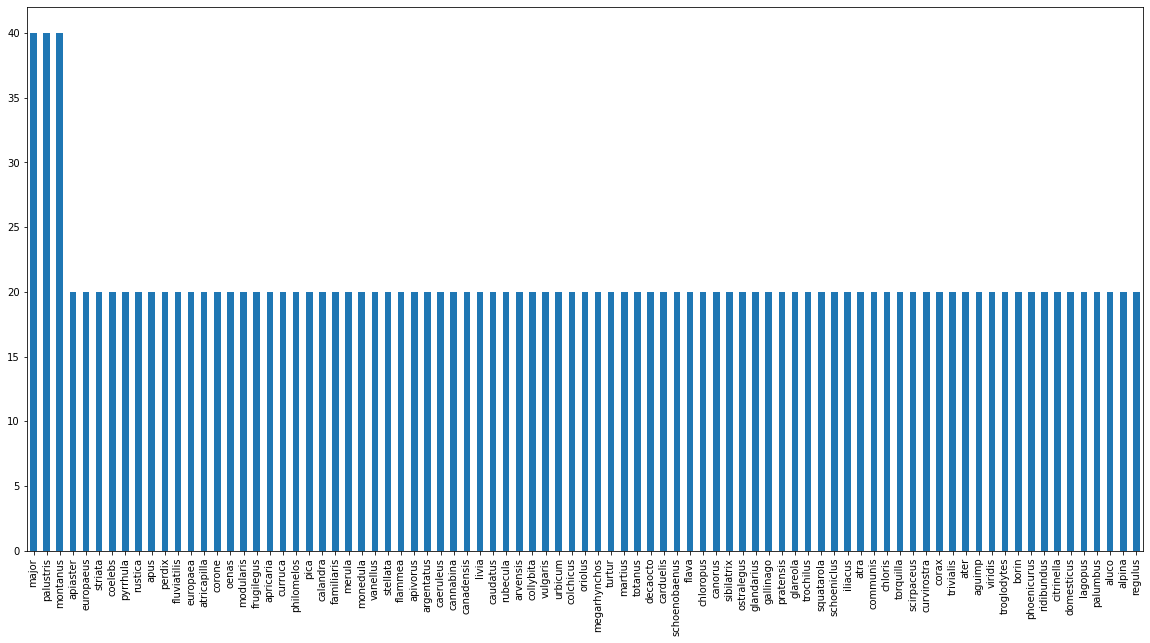

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
train_df['species'].value_counts().plot.bar(ax=ax)
plt.show()


In [8]:
train_df['full_sp_name']= train_df['genus'] + '_' + train_df['species']
test_df ['full_sp_name']= test_df['genus'] + '_' + test_df['species']

In [9]:
features_train= list(train_df.columns)
features_train.remove("id")
features_train.remove("genus")
features_train.remove("species")
features_train.remove("full_sp_name")

features_test= list(test_df.columns)
features_test.remove("id")
features_test.remove("genus")
features_test.remove("species")
features_test.remove("full_sp_name")

In [10]:
train_df.head()

,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species,full_sp_name
0,0,0.997944,0.832392,0.765386,0.704275,0.655724,0.331064,0.927524,0.307601,0.492226,...,2730.515996,2609.940118,2703.391485,2676.400501,2818.375970,2706.119792,2740.820762,2684.624946,flammea,Acanthis_flammea
1,1,0.996255,0.839120,0.760417,0.705142,0.662990,0.329859,0.924461,0.300951,0.493679,...,2730.212864,2609.668564,2703.721292,2676.695013,2818.554958,2705.497472,2741.509333,2683.727859,flammea,Acanthis_flammea
2,2,0.970810,0.823540,0.759508,0.709058,0.659750,0.336233,0.933035,0.301501,0.491263,...,2729.438087,2609.010529,2704.515718,2677.465965,2818.971388,2703.952638,2743.213960,2681.482884,flammea,Acanthis_flammea
3,3,1.000000,0.855558,0.752038,0.710977,0.664579,0.334564,0.928026,0.292012,0.493557,...,2728.961249,2608.631818,2704.971676,2677.953716,2819.200288,2703.033515,2744.224849,2680.133570,flammea,Acanthis_flammea
4,4,1.000000,0.884305,0.741885,0.714775,0.672465,0.329072,0.912804,0.279094,0.501200,...,2728.800252,2608.508516,2705.120155,2678.118949,2819.273155,2702.728487,2744.559785,2679.683390,flammea,Acanthis_flammea


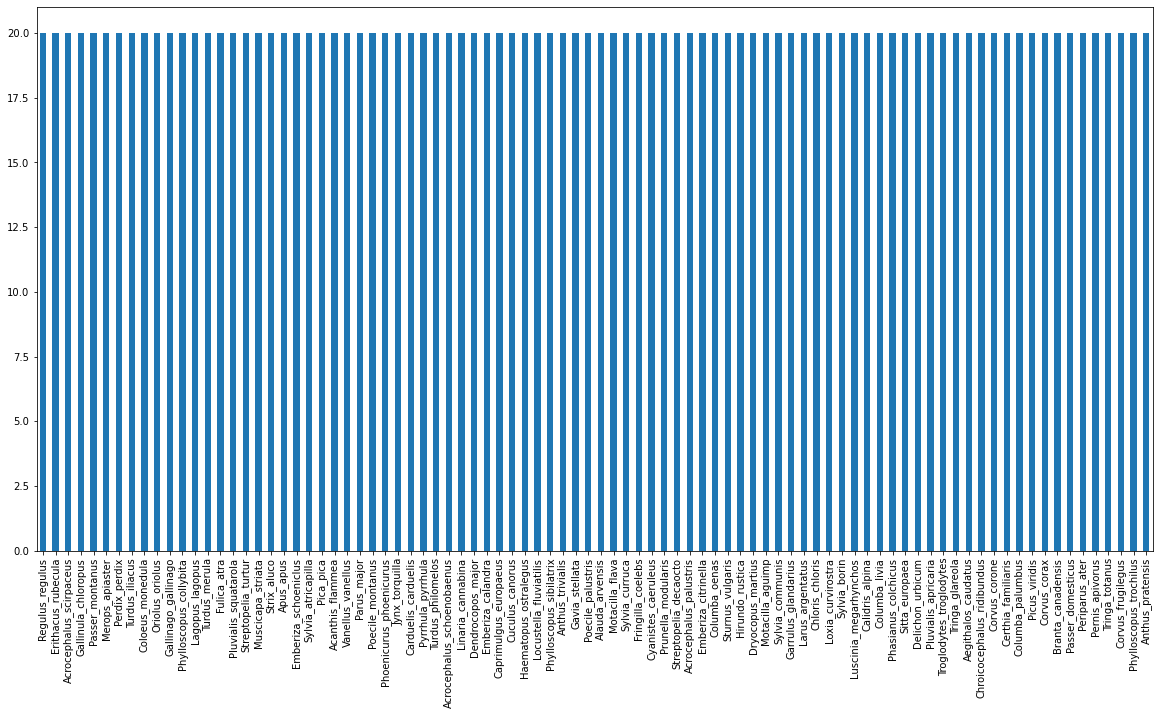

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
train_df['full_sp_name'].value_counts().plot.bar(ax=ax)
plt.show()


In [12]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
scaler.fit(train_df[features_train])

X_train_scaled = scaler.transform(train_df[features_train])
X_test_scaled = scaler.transform(test_df[features_test])

X= X_train_scaled

y= train_df['full_sp_name']

X_test = X_test_scaled

y_test = test_df['full_sp_name']


In [20]:
from sklearn.svm import LinearSVC
LinearSVC = LinearSVC(C=100)
LinearSVC.fit(X, y)
LinearSVC.score(X_test, y_test)
print("Training set score: {:.3f}".format(LinearSVC.score(X, y)))
print("Test set score: {:.3f}".format(LinearSVC.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.982


C:\Users\valer\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [13]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X,y)
print("Accuracy on training set: {:.3f}".format(tree.score(X, y)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.925


In [14]:
tree=DecisionTreeClassifier(max_depth=50, random_state=0)
tree.fit(X,y)
print("Accuracy on train set: {:.3f}".format(tree.score(X, y)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on train set: 1.000
Accuracy on test set: 0.925


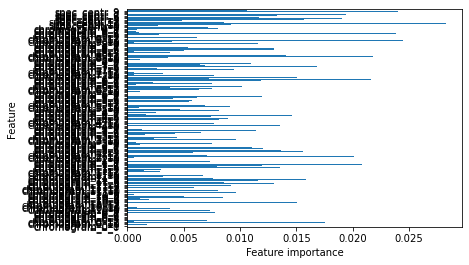

In [15]:
def plot_features_importances(model):
    n_features = train_df[features_train].shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),features_train)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_features_importances(tree)



In [16]:
#However, we needed to keep a significant number of trees in order to improve the result. This is due again to the wide distribution of feautures in the training data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
make_classification(n_samples=1000, n_features=169,n_informative=2, n_redundant=0,random_state=0, shuffle=False)

forest = RandomForestClassifier(n_estimators=100,max_depth=50)
forest.fit(X, y)
forest.score(X_test, y_test)
print("Accuracy on training set: {:.3f}".format(forest.score(X, y)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))





Accuracy on training set: 1.000
Accuracy on test set: 0.987


In [17]:
#from sklearn.ensemble import GradientBoostingClassifier
#gbrt = GradientBoostingClassifier(random_state=0)
#gbrt.fit(X, y)

#print("Accuracy on training set: {:.3f}".format(gbrt.score(X, y)))
#print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg = LogisticRegression().fit(X, y)
print("Training set score: {:.3f}".format(logreg.score(X, y)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.998
Test set score: 0.960


C:\Users\valer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
logreg100 = LogisticRegression(C=100)
logreg100.fit(X, y)
print("Training set score: {:.3f}".format(logreg100.score(X, y)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.979


C:\Users\valer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0, ignore_warnings = True,custom_metric = None)
models,predictions = clf.fit(X,X_test,y,y_test)
print(models)

C:\Users\valer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [05:42<00:00, 11.79s/it]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.99               0.99    None      0.99   
RandomForestClassifier             0.99               0.99    None      0.99   
LogisticRegression                 0.98               0.98    None      0.98   
CalibratedClassifierCV             0.98               0.98    None      0.98   
LinearSVC                          0.98               0.98    None      0.98   
PassiveAggressiveClassifier        0.98               0.98    None      0.98   
BaggingClassifier                  0.98               0.98    None      0.98   
SGDClassifier                      0.96               0.97    None      0.97   
LabelPropagation                   0.97               0.97    None      0.98   
LabelSpreading                     0.97               0.97    None      0.98   
Perceptron                         0.97 

In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X, y)

print("Accuracy on training set: {:.2f}".format(mlp.score(X, y)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.97


In [22]:
# compute the mean value per feature on the training set
mean_on_train = X.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.978


In [23]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.978
